In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [2]:
tenda_mg = pd.read_csv('tenda_propostas_MG.csv',sep=';',decimal = ',')

In [3]:
tenda_mg.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [4]:
tenda_mg.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO17072000780346053,125000.0,1491.0,7794.8
1,PRO17080302895345565,134000.0,2180.9,8924.4
2,PRO17090407800346678,131000.0,1787.0,8460.2
3,PRO209930T8D0S9339298,160000.0,2824.2,6894.2
4,PRO211451F8X0G6345991,160000.0,2453.7,2469.4


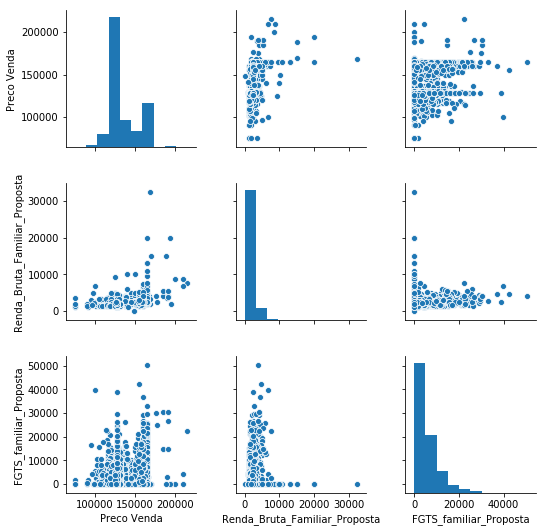

In [5]:
sb.pairplot(tenda_mg)

In [6]:
tenda_drop_mg = tenda_mg.drop(['Chave unica'],axis = 1)
tenda_drop_mg

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,125000.0,1491.0,7794.8
1,134000.0,2180.9,8924.4
2,131000.0,1787.0,8460.2
3,160000.0,2824.2,6894.2
4,160000.0,2453.7,2469.4
5,137000.0,1413.9,2593.5
6,160000.0,3071.7,3454.8
7,125000.0,9303.5,0.0
8,120000.0,1903.7,5612.1
9,157416.0,3014.7,6726.7


K_MEANS (RS)

In [7]:
from sklearn.cluster import KMeans

In [8]:
sb.set_style('darkgrid')

In [9]:
wcss = []

1 635151874177.7642
2 168590677207.237
3 120380173256.79517
4 98977442276.83524
5 84327235332.30826
6 72162819920.41133
7 64751953333.04677
8 52388055462.05419
9 46841526746.880585


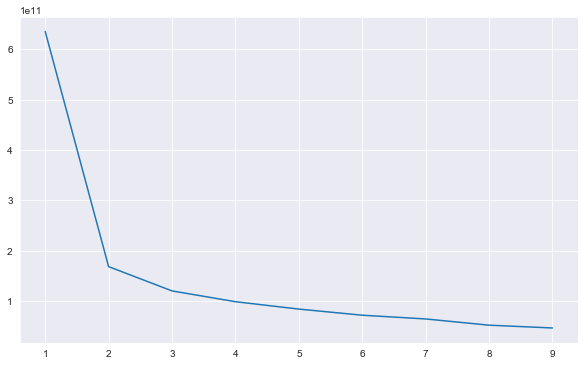

In [10]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_mg)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [11]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [12]:
kmeans.fit(tenda_drop_mg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 2])

CLASSES CRIADAS 

In [14]:
tenda_mg['Kclasses'] = kmeans.labels_

In [15]:
tenda_mg. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO17072000780346053,125000.0,1491.0,7794.8,0
1,PRO17080302895345565,134000.0,2180.9,8924.4,0
2,PRO17090407800346678,131000.0,1787.0,8460.2,0
3,PRO209930T8D0S9339298,160000.0,2824.2,6894.2,1
4,PRO211451F8X0G6345991,160000.0,2453.7,2469.4,1
5,PRO222064M1H9V3345362,137000.0,1413.9,2593.5,0
6,PRO222455D3X4D3346478,160000.0,3071.7,3454.8,1
7,PRO224871Y9T6X7345550,125000.0,9303.5,0.0,0
8,PRO225919J9S4K6345421,120000.0,1903.7,5612.1,2
9,PRO227106N0T5P6334140,157416.0,3014.7,6726.7,1


In [16]:
tenda_mg['Kclasses'] = kmeans.labels_

In [17]:
tenda_mg.Kclasses.value_counts()

0    1123
1     508
2     304
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [18]:
tenda_mg.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,1935.00,1935.00,1935.00,1935.00
mean,135270.02,2295.45,5396.69,0.58
std,17115.09,1388.03,5793.16,0.75
min,75000.00,0.00,0.00,0.00
25%,128000.00,1672.15,800.50,0.00
50%,128000.00,2010.80,3995.10,0.00
75%,151069.40,2488.25,7927.65,1.00
max,215001.00,32430.40,50319.00,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


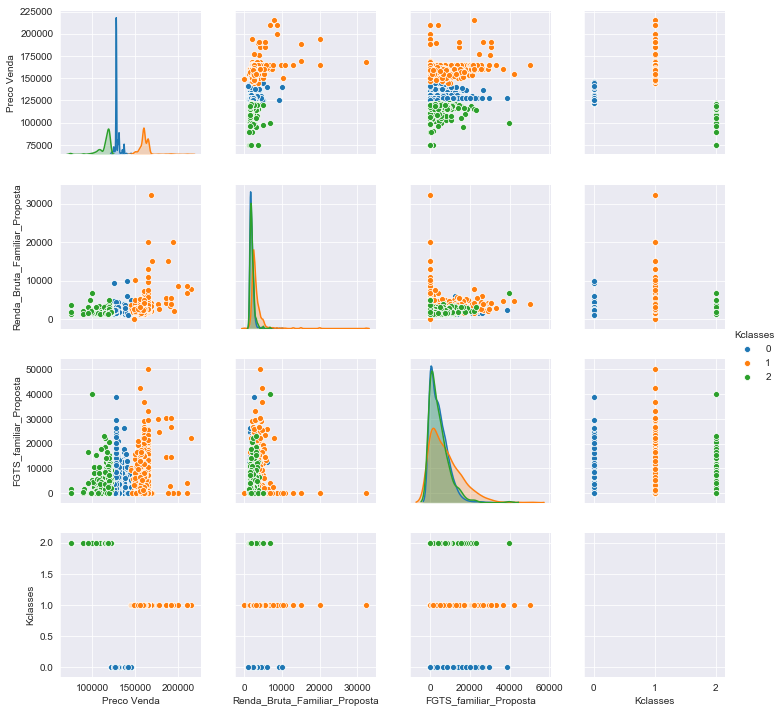

In [19]:
sb.pairplot(tenda_mg,hue='Kclasses')

EXPORTANDO DADOS

In [21]:
tenda_mg.to_csv('clustertenda_MG.csv',sep=';',decimal=',')